1. get checkdst objs from each directory 
2. group them by configuration (fewshot/fullshot) 
3. combine dfs 
4. reformat for plotting 
5. plot 

### Imports

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
# custom import
from checkdst import CheckDST_Trippy

# package imports
import pandas as pd 
import seaborn as sns
import glob 
import os 
from pathlib import Path 

In [89]:
main_dir = "/data/home/justincho/trippy-public-master/results/of_interest"

### Put it all together

In [90]:
from checkdst import (
    get_check_dst_objs, 
    plot_cjga_trends, 
    format_dfs_for_plotting, 
    return_grouped_dfs,
    get_paper_results
)

In [91]:
main_dir

'/data/home/justincho/trippy-public-master/results/of_interest'

In [92]:
dst_results = get_check_dst_objs(main_dir)

2022-01-18 21:40:55.759 | INFO     | checkdst:load_all:355 - Found previously loaded results. Loading it from /data/home/justincho/trippy-public-master/results/of_interest/multiwoz23_lr1e-4_2022-01-04_06:11:20_fewshot_True_42/checkdst_results.json
2022-01-18 21:40:55.774 | INFO     | checkdst:load_all:355 - Found previously loaded results. Loading it from /data/home/justincho/trippy-public-master/results/of_interest/multiwoz23_lr1e-4_2022-01-04_06:11:23_fewshot_True_43/checkdst_results.json
2022-01-18 21:40:55.784 | INFO     | checkdst:load_all:355 - Found previously loaded results. Loading it from /data/home/justincho/trippy-public-master/results/of_interest/multiwoz23_lr1e-4_2022-01-05_09:41:18_fewshot_False_43/checkdst_results.json
2022-01-18 21:40:55.795 | INFO     | checkdst:load_all:355 - Found previously loaded results. Loading it from /data/home/justincho/trippy-public-master/results/of_interest/multiwoz23_lr1e-4_2022-01-05_09:41:24_fewshot_False_46/checkdst_results.json
2022-0

multiwoz23_lr1e-4_2022-01-04_06:11:20_fewshot_True_42
multiwoz23_lr1e-4_2022-01-04_06:11:23_fewshot_True_43
multiwoz23_lr1e-4_2022-01-05_09:41:18_fewshot_False_43
multiwoz23_lr1e-4_2022-01-05_09:41:24_fewshot_False_46
multiwoz23_lr1e-4_2022-01-04_06:11:26_fewshot_True_46
multiwoz23_lr1e-4_2022-01-05_09:41:21_fewshot_False_45
multiwoz23_lr1e-4_2022-01-04_06:11:23_fewshot_True_44
multiwoz23_lr1e-4_2022-01-05_09:41:18_fewshot_False_44
multiwoz23_lr1e-4_2022-01-05_09:19:55_fewshot_False_42
multiwoz23_lr1e-4_2022-01-04_06:11:24_fewshot_True_45


In [108]:
fullshot_dfs, fewshot_dfs = return_grouped_dfs(dst_results)

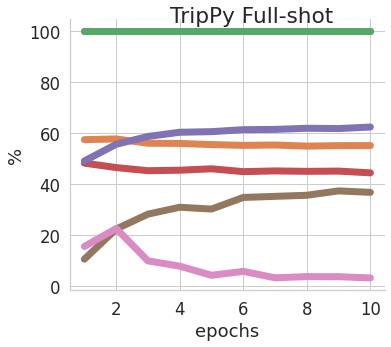

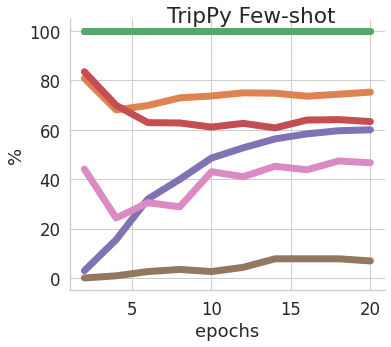

In [109]:
full = format_dfs_for_plotting(fullshot_dfs)
few = format_dfs_for_plotting(fewshot_dfs)
plot_cjga_trends(full, title="TripPy Full-shot")
plot_cjga_trends(few, title="TripPy Few-shot")

In [95]:
trippy_res = pd.concat([get_paper_results(fullshot_dfs), get_paper_results(fewshot_dfs)])
trippy_res

NEI JGA             NEI cJGA              SD JGA              SD cJGA  \
         median       sem     median       sem    median       sem     median   
index                                                                           
23660  0.019736  0.005820   3.331385  0.977301  0.292051  0.003154  44.480034   
5540   0.306614  0.008565  46.639629  1.402135  0.409524  0.007757  63.331972   

                   TP JGA            ...  coref_jga             test_jga  \
            sem    median       sem  ...     median       sem     median   
index                                ...                                   
23660  0.457083  0.402329  0.001178  ...  36.842105  0.532241  62.411829   
5540   0.993140  0.581430  0.004308  ...   6.896552  0.751534  60.000000   

                valid_jga           NoHF Orig      NoHF Swap       
            sem    median       sem    median  sem    median  sem  
index                                                              
23660  0.125576  0.664768  0.002329     100.0  0.0     100.0  0.0  
5540   0.394480  0.567471  0.008768     100.0  0.0     100.0  0.0  

[2 rows x 22 columns]

### Plot ConvBERT results

In [96]:
convbert_main_dir = "/data/home/justincho/dialoglue/trippy/results"
convbert_results = get_check_dst_objs(convbert_main_dir)
convbert_full_dfs, converbert_few_dfs = return_grouped_dfs(convbert_results)

2022-01-18 21:40:57.943 | INFO     | checkdst:load_all:359 - Didn't find previous loaded results. Loading from csv files


multiwoz_trippy_convbert_sd46_fewshot_True_2022-01-16_06:09:36


100%|██████████| 10438/10438 [00:00<00:00, 213030.67it/s]
2022-01-18 21:41:04.341 | INFO     | checkdst:load_orig_jgas:312 - Loading original valid set jgas...
0it [00:00, ?it/s]
2022-01-18 21:41:04.343 | INFO     | checkdst:load_orig_jgas:312 - Loading original test set jgas...
100%|██████████| 11/11 [00:09<00:00,  1.14it/s]
2022-01-18 21:41:13.966 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: NEI
 82%|████████▏ | 9/11 [00:09<00:02,  1.12s/it]/data/home/justincho/miniconda/envs/trippy/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/data/home/justincho/miniconda/envs/trippy/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 11/11 [00:12<00:00,  1.11s/it]
2022-01-18 21:41:26.229 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: T

multiwoz_trippy_convbert_sd43_fewshot_True_2022-01-16_06:09:33


100%|██████████| 10438/10438 [00:00<00:00, 213461.72it/s]
2022-01-18 21:41:57.353 | INFO     | checkdst:load_orig_jgas:312 - Loading original valid set jgas...
0it [00:00, ?it/s]
2022-01-18 21:41:57.356 | INFO     | checkdst:load_orig_jgas:312 - Loading original test set jgas...
100%|██████████| 11/11 [00:09<00:00,  1.12it/s]
2022-01-18 21:42:07.198 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: NEI
100%|██████████| 11/11 [00:12<00:00,  1.14s/it]
2022-01-18 21:42:19.702 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: TP
100%|██████████| 11/11 [00:10<00:00,  1.08it/s]
2022-01-18 21:42:29.929 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: SD
100%|██████████| 11/11 [00:09<00:00,  1.12it/s]
2022-01-18 21:42:39.747 | INFO     | checkdst:load_coref_jgas:334 - Loading original test set coref jgas...
100%|██████████| 11/11 [00:04<00:00,  2.45it/s]
2022-01-18 21:42:44.278 | INFO     | c

multiwoz_trippy_convbert_sd47_fewshot_True_2022-01-16_06:15:14


100%|██████████| 10438/10438 [00:00<00:00, 213825.58it/s]
2022-01-18 21:42:50.251 | INFO     | checkdst:load_orig_jgas:312 - Loading original valid set jgas...
0it [00:00, ?it/s]
2022-01-18 21:42:50.253 | INFO     | checkdst:load_orig_jgas:312 - Loading original test set jgas...
100%|██████████| 11/11 [00:09<00:00,  1.10it/s]
2022-01-18 21:43:00.231 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: NEI
100%|██████████| 11/11 [00:12<00:00,  1.14s/it]
2022-01-18 21:43:12.789 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: TP
100%|██████████| 11/11 [00:10<00:00,  1.06it/s]
2022-01-18 21:43:23.190 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: SD
100%|██████████| 11/11 [00:09<00:00,  1.12it/s]
2022-01-18 21:43:33.008 | INFO     | checkdst:load_coref_jgas:334 - Loading original test set coref jgas...
100%|██████████| 11/11 [00:04<00:00,  2.47it/s]
2022-01-18 21:43:37.490 | INFO     | c

multiwoz_trippy_convbert_sd45_fewshot_True_2022-01-16_06:09:36


100%|██████████| 10438/10438 [00:00<00:00, 210419.76it/s]
2022-01-18 21:43:43.593 | INFO     | checkdst:load_orig_jgas:312 - Loading original valid set jgas...
0it [00:00, ?it/s]
2022-01-18 21:43:43.596 | INFO     | checkdst:load_orig_jgas:312 - Loading original test set jgas...
100%|██████████| 11/11 [00:09<00:00,  1.11it/s]
2022-01-18 21:43:53.498 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: NEI
100%|██████████| 11/11 [00:12<00:00,  1.15s/it]
2022-01-18 21:44:06.141 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: TP
100%|██████████| 11/11 [00:10<00:00,  1.08it/s]
2022-01-18 21:44:16.371 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: SD
100%|██████████| 11/11 [00:09<00:00,  1.11it/s]
2022-01-18 21:44:26.288 | INFO     | checkdst:load_coref_jgas:334 - Loading original test set coref jgas...
100%|██████████| 11/11 [00:04<00:00,  2.49it/s]
2022-01-18 21:44:30.749 | INFO     | c

multiwoz_trippy_convbert_sd44_fewshot_True_2022-01-16_06:09:33


100%|██████████| 10438/10438 [00:00<00:00, 212127.49it/s]
2022-01-18 21:44:36.935 | INFO     | checkdst:load_orig_jgas:312 - Loading original valid set jgas...
0it [00:00, ?it/s]
2022-01-18 21:44:36.936 | INFO     | checkdst:load_orig_jgas:312 - Loading original test set jgas...
100%|██████████| 11/11 [00:09<00:00,  1.12it/s]
2022-01-18 21:44:46.780 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: NEI
100%|██████████| 11/11 [00:12<00:00,  1.13s/it]
2022-01-18 21:44:59.226 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: TP
100%|██████████| 11/11 [00:10<00:00,  1.08it/s]
2022-01-18 21:45:09.446 | INFO     | checkdst:load_conditional_jgas:279 - Loading jgas for invariance type: SD
100%|██████████| 11/11 [00:09<00:00,  1.13it/s]
2022-01-18 21:45:19.225 | INFO     | checkdst:load_coref_jgas:334 - Loading original test set coref jgas...
100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


In [103]:
convbert_full_dfs, convbert_few_dfs = return_grouped_dfs(convbert_results)

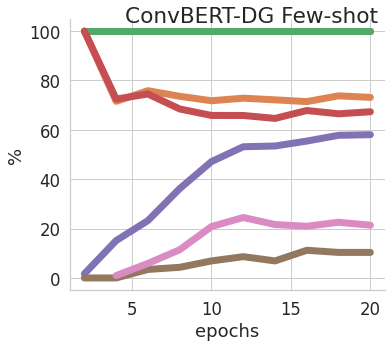

In [107]:
# convbert_full = format_dfs_for_plotting(convbert_full_dfs)
convbert_few = format_dfs_for_plotting(converbert_few_dfs)
# plot_cjga_trends(convbert_full, title="ConvBERT-DG Full-shot")
plot_cjga_trends(convbert_few, title="ConvBERT-DG Few-shot")

In [ ]:
convbert_res_by_index = get_paper_results(convbert_full_dfs, final=False)
trippy_res_by_index = get_paper_results(fullshot_dfs, final=False)

In [ ]:
convbert_res = pd.concat([get_paper_results(convbert_full_dfs), get_paper_results(converbert_few_dfs)])
convbert_res

NEI JGA             NEI cJGA              SD JGA              SD cJGA  \
         median       sem     median       sem    median       sem     median   
index                                                                           
23660  0.014930  0.003239   2.488889  0.549633  0.301546  0.004175  46.883761   
4986   0.172897  0.021056  26.647059  3.284484  0.433333  0.012187  68.341503   

                   TP JGA            ... coref_jga             test_jga  \
            sem    median       sem  ...    median       sem     median   
index                                ...                                  
23660  0.672702  0.398447  0.001589  ...  35.98862  0.644995  61.977754   
4986   0.783315  0.568381  0.012192  ...   8.62069  1.335511  58.621554   

                valid_jga           NoHF Orig      NoHF Swap       
            sem    median       sem    median  sem    median  sem  
index                                                              
23660  0.152723  0.867739  0.003114     100.0  0.0     100.0  0.0  
4986   1.360337  0.579088  0.014703     100.0  0.0     100.0  0.0  

[2 rows x 22 columns]

In [ ]:
pd.concat([trippy_res, convbert_res])

NEI JGA             NEI cJGA               SD JGA            \
          median       sem     median       sem     median       sem   
index                                                                  
23660   1.973571  0.581959   3.331385  0.977301  29.205100  0.315411   
5540   30.661395  0.856481  46.639629  1.402135  40.952381  0.775664   
23660   1.493050  0.323911   2.488889  0.549633  30.154639  0.417511   
4986   17.289720  2.105595  26.647059  3.284484  43.333333  1.218684   

         SD cJGA               TP JGA              TP cJGA            \
          median       sem     median       sem     median       sem   
index                                                                  
23660  44.480034  0.457083  40.232913  0.117753  55.151515  0.391986   
5540   63.331972  0.993140  58.143036  0.430786  75.257353  0.524478   
23660  46.883761  0.672702  39.844725  0.158861  54.909318  0.243564   
4986   68.341503  0.783315  56.838143  1.219207  73.585691  0.581475   

       coref_jga             test_jga            valid_jga            
          median       sem     median       sem     median       sem  
index                                                                 
23660  36.842105  0.532241  62.411829  0.125576  66.476810  0.232905  
5540    6.896552  0.751534  60.000000  0.394480  56.747096  0.876784  
23660  35.988620  0.644995  61.977754  0.152723  86.773905  0.311372  
4986    8.620690  1.335511  58.621554  1.360337  57.908847  1.470327

In [ ]:
order = [
    "test_jga", 
    "coref_jga", 
    "TP cJGA", 
    "SD cJGA",
    "NEI cJGA",
    "NoHF Orig",
    "NoHF Swap",
]

# for idx, row in valid_res['full'].iterrows(): 
# for idx, row in trippy_res.iterrows(): 
# for idx, row in pd.concat([trippy_res, convbert_res]).iterrows(): 
# for idx, row in convbert_res_by_index.iterrows(): 
for idx, row in trippy_res_by_index.iterrows(): 

    # print(row['name'][0])
    overleaf_str = ""
    # print(row['valid_jga']['median'])
    for o in order: 
        if "NoHF" in o: 
            overleaf_str += "100 $\pm$ 0 & "
            # overleaf_str += " - & "
        else:
            overleaf_str += f"{round(row[o]['median'],1)} $\pm$ {round(row[o]['sem'],1)} & "
    print("& " + overleaf_str[:-2] + " \\\\")
    print("\n\n")
    # break

& 49.1 $\pm$ 1.1 & 10.7 $\pm$ 1.0 & 57.5 $\pm$ 0.7 & 48.3 $\pm$ 1.1 & 15.7 $\pm$ 3.4 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 55.7 $\pm$ 0.4 & 22.5 $\pm$ 0.9 & 57.8 $\pm$ 0.4 & 46.5 $\pm$ 1.3 & 22.7 $\pm$ 4.0 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 58.7 $\pm$ 0.3 & 28.3 $\pm$ 1.0 & 56.1 $\pm$ 0.5 & 45.3 $\pm$ 0.8 & 10.0 $\pm$ 2.2 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 60.4 $\pm$ 0.5 & 31.0 $\pm$ 0.5 & 56.0 $\pm$ 0.4 & 45.5 $\pm$ 0.4 & 7.9 $\pm$ 0.8 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 60.6 $\pm$ 0.3 & 30.3 $\pm$ 0.8 & 55.6 $\pm$ 0.3 & 46.1 $\pm$ 1.3 & 4.4 $\pm$ 3.3 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 61.4 $\pm$ 0.3 & 34.9 $\pm$ 0.8 & 55.2 $\pm$ 0.2 & 45.0 $\pm$ 0.9 & 5.9 $\pm$ 1.2 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 61.5 $\pm$ 0.3 & 35.3 $\pm$ 0.7 & 55.4 $\pm$ 0.3 & 45.2 $\pm$ 0.3 & 3.4 $\pm$ 2.2 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 61.9 $\pm$ 0.2 & 35.7 $\pm$ 0.6 & 54.9 $\pm$ 0.3 & 45.1 $\pm$ 0.5 & 3.9 $\pm$ 0.5 & 100 $\pm$ 0 & 100 $\pm$ 0  \\



& 61.8 $\pm$ 0.2 & 37.4 $\pm$ 0.7 & 55.1 $\pm